In [33]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [19]:
# !pip install -U finance-datareader

In [34]:
import FinanceDataReader as fdr
fdr.__version__

'0.5.0'

In [35]:
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Name,Sector,Industry
0,001040,CJ,기타 금융업,지주회사
1,012630,HDC,건물 건설업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업"
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,001390,KG케미칼,기초 화학물질 제조업,"콘크리트혼화제, 비료, 친환경농자재, 수처리제"
4,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업


In [36]:
len(df_krx)

2206

# Tagger

In [70]:
import FinanceDataReader as fdr

start_date = '1990-1-1' 
end_date = '2018-7-15'

#Ticker 확인 ex) 셀트리온
df = fdr.DataReader('068270', start_date, end_date)
    
df.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-03-17,38465,38465,39112,38141,461610.0,-0.0095
2014-03-18,38835,38835,39251,38789,339260.0,0.0096
2014-03-19,38465,39066,39159,38465,338040.0,-0.0095
2014-03-20,37818,38280,38604,37263,644290.0,-0.0168
2014-03-21,38419,37772,38558,37772,339410.0,0.0159


# Graph

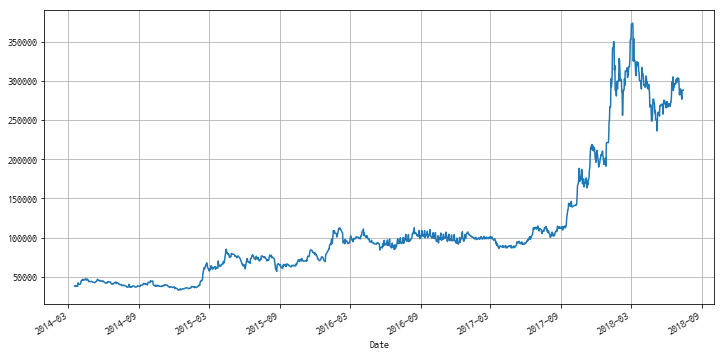

In [71]:
df['Close'].plot(figsize=(12,6), grid=True);

In [72]:
df_trunc = df[:'2018-7-15']
df_trunc

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2014-03-17,38465,38465,39112,38141,461610.0,-0.0095
2014-03-18,38835,38835,39251,38789,339260.0,0.0096
2014-03-19,38465,39066,39159,38465,338040.0,-0.0095
2014-03-20,37818,38280,38604,37263,644290.0,-0.0168
2014-03-21,38419,37772,38558,37772,339410.0,0.0159
2014-03-24,38234,38927,38927,38234,290670.0,-0.0048
2014-03-25,38188,38373,38511,37910,299060.0,-0.0012
2014-03-26,42534,38188,43782,38188,3480000.0,0.1138
2014-03-27,41193,42534,42811,40453,1580000.0,-0.0315


In [73]:
df = pd.DataFrame({'ds':df_trunc.index, 'y':df_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2014-03-17,38465
1,2014-03-18,38835
2,2014-03-19,38465
3,2014-03-20,37818
4,2014-03-21,38419


In [74]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [75]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1535,2019-07-11
1536,2019-07-12
1537,2019-07-13
1538,2019-07-14
1539,2019-07-15


In [76]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1535,2019-07-11,495969.175114,340626.685215,660162.870021
1536,2019-07-12,496406.724419,346052.284772,661517.883871
1537,2019-07-13,498260.389503,345799.718659,664544.279253
1538,2019-07-14,501020.019217,344642.710896,667730.511238
1539,2019-07-15,497245.979590,341968.691477,669807.620283


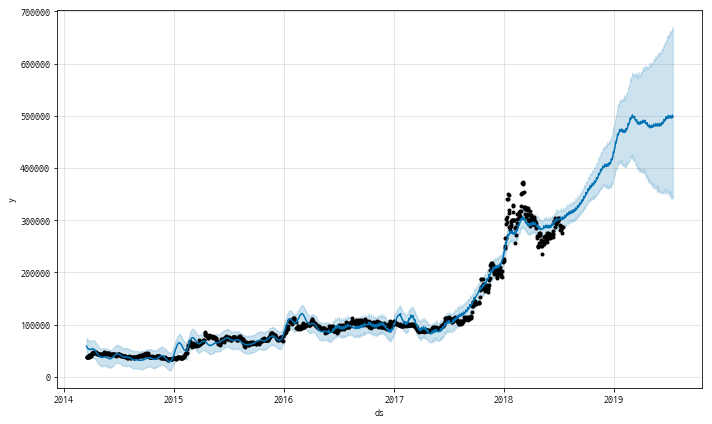

In [77]:
m.plot(forecast);

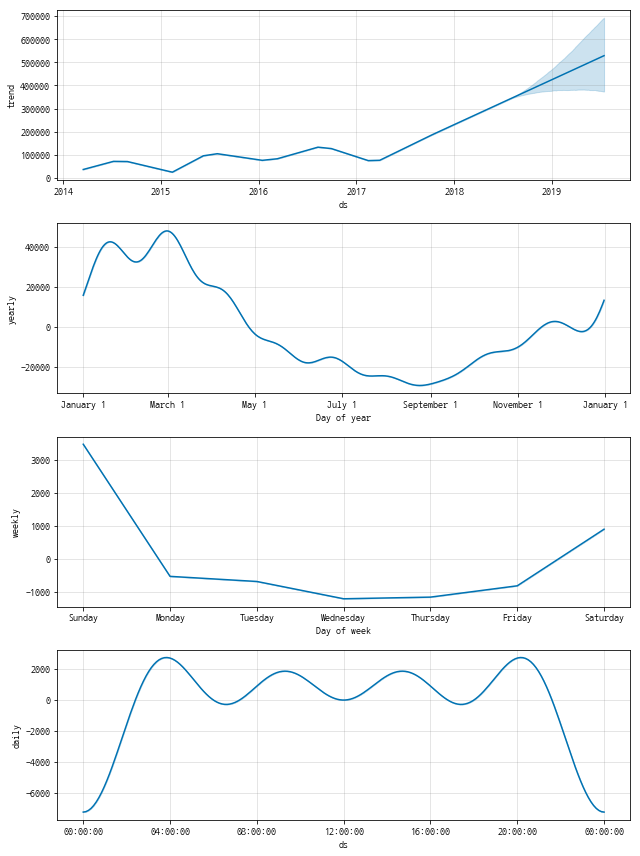

In [78]:
m.plot_components(forecast);